In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
from matplotlib import gridspec
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
from time import sleep
import plotly.io as pio
from plotly.offline import init_notebook_mode
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit
from hallprobesim_redux import *
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
df_long_250mm = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/bfield_map_r250mm_p10cm_lengthx10_1232173pts_09-07_160736',input_type = 'pkl').data_frame
df_long_250mm_hg = DataFrameMaker(mu2e_ext_path+'datafiles/FieldMapsCole/10x_high_granularity_cylin_3846784pts_r250mm_p10cm_10-06_004607',input_type = 'pkl').data_frame


/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:842: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.

/usr/local/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning:

The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.



In [ ]:
phi=3*np.pi/8
fig = mu2e_plot3d(df_long_250mm_hg, 'R', 'Z', 'Bphi', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Btheta, Solenoid B', df_fit=False, mode='plotly_nb', ptype='3d', units='m', aspect='rect2', do2pi=True)
#pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bt_B.png')

# Helical Fits

In [3]:
cfg_pickle_Hel = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit', save_name='solA_fit', recreate=False)
cfg_params_Hel  = cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0, ms_c1=0, ns_c1=0,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 version=1000)
hmd, ff = field_map_analysis('fma_fit_solA', cfg_data_Cole_250mm_long_cyl,
                                  cfg_geom_Cole_250mm_long_cyl, cfg_params_Hel,
                                  cfg_pickle_Hel, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 7.74242 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 140
    # data points      = 28800
    # variables        = 25
    chi-square         = 0.00001
    reduced chi-square = 0.00000
    Akaike info crit   = -631939.94904
    Bayesian info crit = -631733.24577
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -5.7672e-12 +/- 0        (0.00%) (init= 0)
    Dh1_0_0:   4.4802e-11 +/- 0        (0.00%) (init= 0)
    Ah1_0_1:   0 (fixed)
    B

In [8]:
cfg_pickle_Hel_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_fit', save_name='solA_fit', recreate=True)
_, ff_fullsim = field_map_analysis('fma_fit_solA', cfg_data_Cole_250mm_long_cyl_hg,
                                  cfg_geom_Cole_250mm_long_cyl_hg, cfg_params_Hel,
                                  cfg_pickle_Hel_fs, cfg_plot_none)
df_fs_hel =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0.1, ms_h1=2, ns_h1=3, pitch2=0, ms_h2=0, ns_h2=0, length1=0, ms_c1=0, ns_c1=0, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 3.66126 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 226800
    # variables        = 0
    chi-square         = 0.00010
    reduced chi-square = 0.00000
    Akaike info crit   = -4883798.51417
    Bayesian info crit = -4883798.51417
[[Variables]]
    pitch1:    0.1 (fixed)
    ms_h1:     2 (fixed)
    ns_h1:     3 (fixed)
    pitch2:    0 (fixed)
    ms_h2:     0 (fixed)
    ns_h2:     0 (fixed)
    length1:   0 (fixed)
    ms_c1:     0 (fixed)
    ns_c1:     0 (fixed)
    length2:   0 (fixed)
    ms_c2:     0 (fixed)
    ns_c2:     0 (fixed)
    Ah1_0_0:   0 (fixed)
    Bh1_0_0:   0 (fixed)
    Ch1_0_0:  -5.767198e-12 (fixed)
    Dh1_0_0:   4.480205e-11 (fixed)
    Ah1_0_1:   0 (fixed)
    Bh1_0_1:   0 (fixed)
    Ch1_0_1:  -

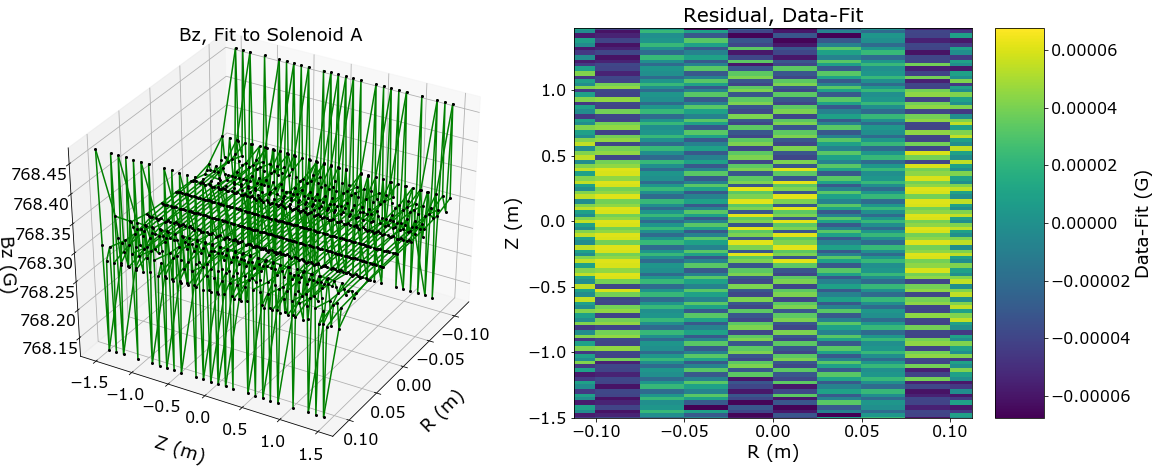

In [4]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bz', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Bz, Fit to Solenoid A', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
#pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bz_A_fit.png')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bz_A_fit.png')

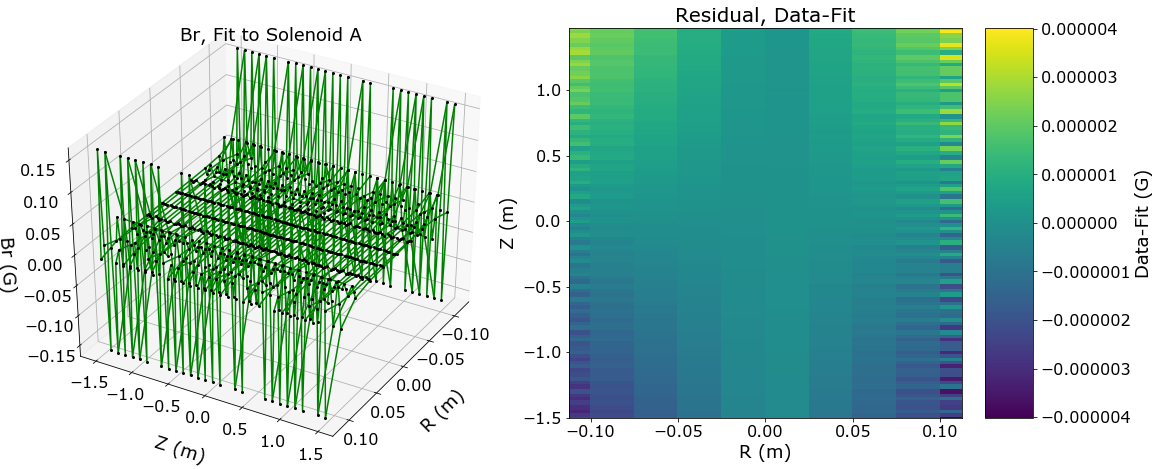

In [5]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Br', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Br, Fit to Solenoid A', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_br_A_fit.png')
#pio.write_image(fig, '/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_br_A_fit.png')

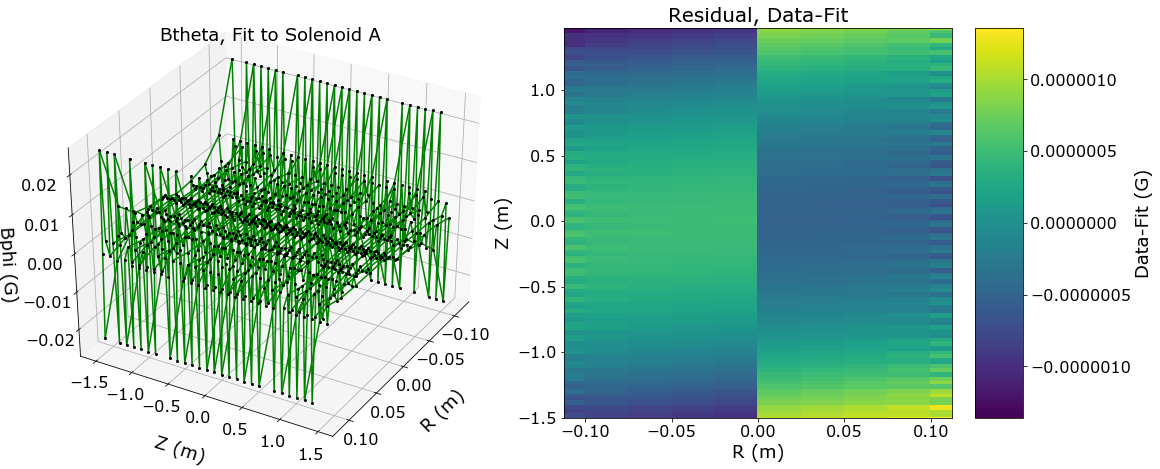

In [6]:
phi=0
fig = mu2e_plot3d(ff.input_data, 'R', 'Z', 'Bphi', f'R<0.15 and Phi=={phi} and -2<Z<2',
            title_simp = 'Btheta, Fit to Solenoid A', df_fit=True, mode='mpl', ptype='3d', units='m', aspect='rect2', do2pi=True)
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/fig_bt_A_fit.png')

In [35]:
df_fs_hel =ff_fullsim.input_data

# Cylindrical Fits

In [7]:
ns = 36
cfg_pickle_Cyl = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_cyl_fit', save_name='solA_cyl_fit', recreate=False)
cfg_params_Cyl  = cfg_params(pitch1=0, ms_h1=0, ns_h1=0,
                                 pitch2=0, ms_h2=0, ns_h2=0,
                                 length1=0.05, ms_c1=1, ns_c1=ns,
                                 length2=0, ms_c2=0, ns_c2=0,
                                 version=1000)
hmd, ff = field_map_analysis('fma_cyl_fit_solA', cfg_data_Cole_250mm_long_cyl,
                                  cfg_geom_Cole_250mm_long_cyl, cfg_params_Cyl,
                                  cfg_pickle_Cyl, cfg_plot_none)

fitting with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=36, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 118.511 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3228
    # data points      = 28800
    # variables        = 118
    chi-square         = 27.69383
    reduced chi-square = 0.00097
    Akaike info crit   = -199835.32729
    Bayesian info crit = -198859.68788
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      36 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.5837e-05 +/- 0        (0.00%) (init= 0)
    Bc1_0_1:   -4.7879e-06 +/- 0       

Text(0.5,1,'Ds')

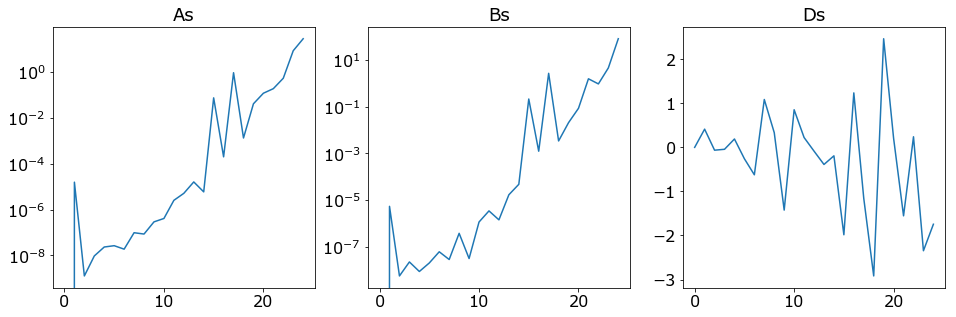

In [147]:
Ds = [ff.params[d].value for d in ff.params if 'D' in d]
As = [ff.params[d].value for d in ff.params if 'A' in d]
Bs = [ff.params[d].value for d in ff.params if 'B' in d]
fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
ax = fig.add_subplot(1, 3, 1)
ax.semilogy(range(ns), [abs(a) for a in As])
plt.title('As')
ax = fig.add_subplot(1, 3, 2)
ax.semilogy(range(ns), [abs(b) for b in Bs])
plt.title('Bs')
ax = fig.add_subplot(1, 3, 3)
ax.plot(range(ns), Ds)
plt.title('Ds')

In [9]:
cfg_pickle_Cyl_fs = cfg_pickle(use_pickle=False, save_pickle=True,
                             load_name='solA_cyl_fit', save_name='solA_cyl_fit', recreate=True)
_, ff_fullsim = field_map_analysis('fma_cyl_fit_solA', cfg_data_Cole_250mm_long_cyl_hg,
                                  cfg_geom_Cole_250mm_long_cyl_hg, cfg_params_Cyl,
                                  cfg_pickle_Cyl_fs, cfg_plot_none)
df_fs_cyl =ff_fullsim.input_data

recreating fit with func_version=1000,
cfg_params(pitch1=0, ms_h1=0, ns_h1=0, pitch2=0, ms_h2=0, ns_h2=0, length1=0.05, ms_c1=1, ns_c1=36, length2=0, ms_c2=0, ns_c2=0, version=1000)
Elapsed time was 4.22577 seconds
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 226800
    # variables        = 0
    chi-square         = 522847.99254
    reduced chi-square = 2.30533
    Akaike info crit   = 189428.39603
    Bayesian info crit = 189428.39603
[[Variables]]
    pitch1:     0 (fixed)
    ms_h1:      0 (fixed)
    ns_h1:      0 (fixed)
    pitch2:     0 (fixed)
    ms_h2:      0 (fixed)
    ns_h2:      0 (fixed)
    length1:    0.05 (fixed)
    ms_c1:      1 (fixed)
    ns_c1:      36 (fixed)
    length2:    0 (fixed)
    ms_c2:      0 (fixed)
    ns_c2:      0 (fixed)
    Ac1_0_0:    0 (fixed)
    Bc1_0_0:    0 (fixed)
    Dc1_0:      0 (fixed)
    Ac1_0_1:    1.583671e-05 (fixed)
    Bc1_0_1:   -4.787929e-06 (fixed)
    Dc1_1:     -2.

# Residuals

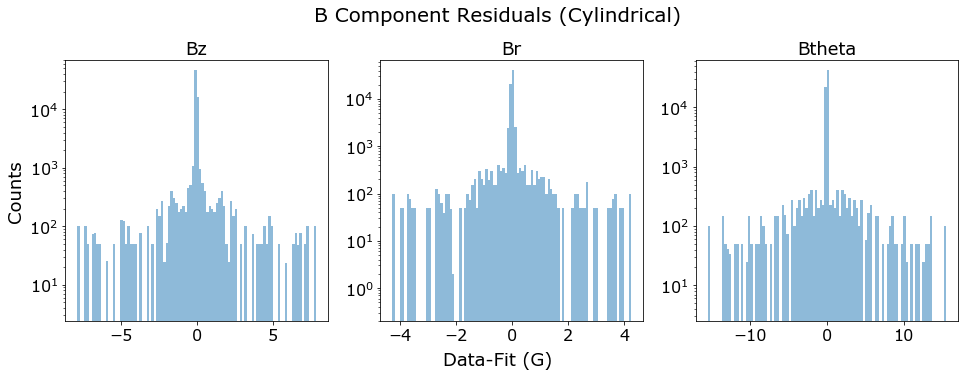

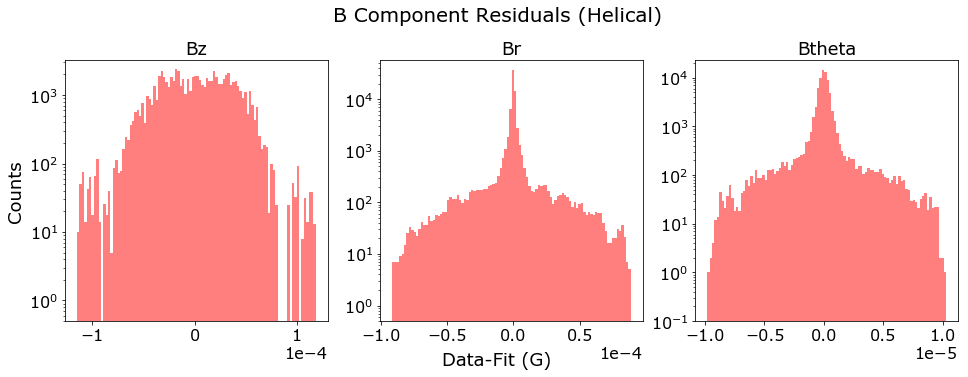

In [37]:
fig = plt.figure(figsize=plt.figaspect(0.3))
fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
ax = fig.add_subplot(1, 3, 1)
_ = splt.hist((df_fs_cyl.Bz-df_fs_cyl.Bz_fit), ax=ax, bins=100, log=True)
ax.set_title('Bz')
ax.set_ylabel('Counts')
ax = fig.add_subplot(1, 3, 2)
_ = splt.hist((df_fs_cyl.Br-df_fs_cyl.Br_fit), ax=ax, bins=100, log=True)
ax.set_title('Br')
ax = fig.add_subplot(1, 3, 3)
_ = splt.hist((df_fs_cyl.Bphi-df_fs_cyl.Bphi_fit), ax=ax, bins=100, log=True)
ax.set_title('Btheta')
fig.suptitle('B Component Residuals (Cylindrical)', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solA_hel.pdf')

fig = plt.figure(figsize=plt.figaspect(0.3), constrained_layout=False)
fig.text(0.5,0.01, "Data-Fit (G)", ha="center", va="center", fontsize=18)
ax = fig.add_subplot(1, 3, 1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useOffset=False)
_ = splt.hist((df_fs_hel.Bz-df_fs_hel.Bz_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title('Bz')
ax.set_ylabel('Counts')
ax = fig.add_subplot(1, 3, 2)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs_hel.Br-df_fs_hel.Br_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title('Br')
ax = fig.add_subplot(1, 3, 3)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
_ = splt.hist((df_fs_hel.Bphi-df_fs_hel.Bphi_fit), ax=ax, bins=100, log=True, color='r')
ax.set_title('Btheta')
fig.suptitle('B Component Residuals (Helical)', verticalalignment='bottom')
plt.savefig('/Users/brianpollack/Documents/Notes_Papers/Helix/figs/res_solA_cyl.pdf')